In [204]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from sklearn import linear_model


In [205]:
np.random.seed(42)

In [206]:
filePath='/cxldata/datasets/project/bikes.csv'

In [207]:
bikesData= pd.read_csv(filePath)

In [208]:
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [209]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [210]:
bikesData['yr'].unique()

array([0, 1])

In [211]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [212]:
columnsToDrop= ['instant', 'casual', 'registered', 'atemp', 'dteday']
bikesData.drop(columnsToDrop, axis=1, inplace=True)

In [213]:
np.random.seed(42)

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [216]:
train_set, test_set = train_test_split(bikesData, train_size=0.7)


In [217]:
train_set.sort_values('dayCount', axis=0, inplace= True)
test_set.sort_values('dayCount', axis=0, inplace= True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
train_set


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,0.250000
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,0.26,0.48,0.0896,164,723.833333
17373,1,1,12,18,0,1,1,2,0.26,0.48,0.1343,122,723.875000
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000


In [219]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,0.2836,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,0.2239,49,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,0.1940,34,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,0.1940,224,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333


In [220]:
train_set.sort_values('dayCount', axis=0, inplace= True)
test_set.sort_values('dayCount', axis=0, inplace= True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [222]:
columnsToScale = ['temp', 'hum', 'windspeed']

In [223]:
scaler = StandardScaler()
bikesData[columnsToScale]= scaler.fit_transform(bikesData[columnsToScale])

In [224]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [225]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [226]:
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost

In [228]:
trainingCols= train_set.drop(['cnt'], axis=1)
trainingLabels= train_set['cnt']

In [229]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [230]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(dt_mae_scores)


Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


In [231]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(dt_mse_scores)

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [232]:
lin_reg = LinearRegression()

In [233]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942255
Standard deviation: 31.426965705295334
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181802
Standard deviation: 37.55565075919532


In [234]:
forest_reg = RandomForestRegressor()

rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(rf_mse_scores)

Scores: [35.48086278 33.93872638 28.9835415  32.066212   36.19552999 57.26208059
 41.36421875 41.23574836 37.67111842 86.53004112]
Mean: 43.07280798744756
Standard deviation: 16.22762305780447
Scores: [ 47.14347093  49.81291761  44.11586091  52.49424117  60.74265875
  95.38930015  66.57132645  65.2368104   61.64180033 130.67350414]
Mean: 67.38218908253172
Standard deviation: 25.206630949362648


In [235]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [120,150], 'max_features':[10,12], 'max_depth':[15,28]}]

In [236]:
grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

In [237]:
grid_search.fit(trainingCols, trainingLabels)
grid_search.best_params_

{'max_depth': 15, 'max_features': 10, 'n_estimators': 120}

In [238]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00476988 0.00399766 0.00523469 0.58923902 0.00218717 0.01562918
 0.06842376 0.01695523 0.094308   0.03210125 0.00806388 0.15909027]


In [242]:
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [243]:
test_set.sort_values(by='dayCount', axis=0, inplace=True)
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set[test_x_cols]
y_test = test_set[test_y_cols]

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
final_model.fit(trainingCols, trainingLabels)
test_set['predictedCounts_test']= final_model.predict(X_test)
mse= mean_squared_error(y_test, test_set['predictedCounts_test'])
final_mse= np.sqrt(mse)
print(final_mse)

39.20308806749067


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


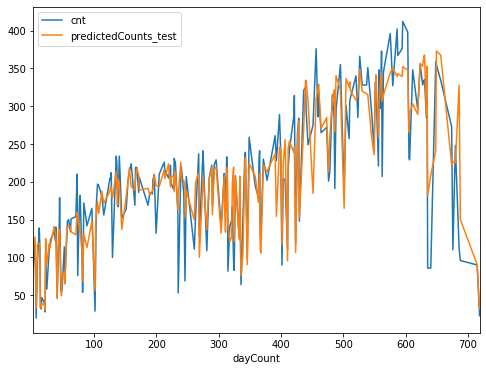

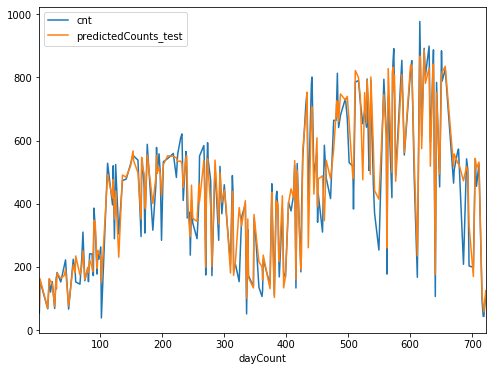

In [252]:
times = [9,18]
for time in times:
      fig = plt.figure(figsize=(8, 6))
      fig.clf()
      ax = fig.gca()
      test_set_freg_time = test_set[test_set.hr == time]
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
      plt.show()